# Guessing Game

> Take a standard deck of cards, and pull out the numbered cards from one suit (the cards 2 through 10). Shuffle them, and then lay them face down in a row. Flip over the first card. Now guess whether the next card in the row is bigger or smaller. If you’re right, keep going.
> 
> If you play this game optimally, what’s the probability that you can get to the end without making any mistakes?
> 
> *Extra credit*: What if there were more cards — 2 through 20, or 2 through 100? How do your chances of getting to the end change? ([via](https://fivethirtyeight.com/features/step-1-game-theory-step-2-step-3-profit/))

### Simulating the Game

Let's start with a few functions for a basic simulation of the game:

In [24]:
import random

def shuffle_deck(deck):
    """Take a deck (a list of ints); return a shuffled version of that deck."""
    random.shuffle(deck)
    return deck

def probability_higher(latest_card, possible_cards=[]):
    """Take a card n and list of possible remaining; return probability next n will be higher as float."""
    n_higher = sum(i > latest_card for i in possible_cards)
    n_remaining = len(possible_cards)
    return n_higher/n_remaining

def predict_as_bool(p_higher):
    """Take a float probability that next card will be higher; return bool that it will be 'higher'."""
    if p_higher > 0.5:
        prediction = True
    elif p_higher < 0.5:
        prediction = False
    else:
        prediction = bool(random.getrandbits(1))
    return prediction

def next_card_is_higher(latest_card, remaining_cards):
    """Return true if next card in deck of remaining cards is higher than latest; false otherwise."""
    return latest_card < remaining_cards[0]

def simulate_game(max_card_num=10):
    """Take a maximum card number (default 10) and simulate the game; return bool win/loss."""
    card_list = [x for x in range(2,max_card_num+1)] # raw deck of card numbers
    cards = shuffle_deck(card_list) # the shuffled deck
    while True:
        if len(cards) == 1: # if there's only one card remaining, the game is over.
            break
        latest = cards.pop(0) # 'flip' the next card and remove it from the shuffled deck.
        prediction = predict_as_bool(probability_higher(latest, cards)) # get boolean prediction
        if prediction != next_card_is_higher(latest, cards): # check prediction and break if wrong
            break
    return len(cards) == 1 # if you finished the game successfully, return true; false otherwise

This is all pretty simple. We've now got a function `simulate_game()` that returns `True` if the game ends without a wrong prediction and `False` otherwise. This works for any arbitrary maximum card number (defaulting to `10`, as in the question).

#### A Normal (2-10 Deck)
So, let's run 1,000,000 simulations for the first version, a normal 2-10 deck:

In [32]:
normal_deck_simulations = [simulate_game() for i in range(1000000)]
normal_deck_win_rate = sum(normal_deck_simulations)/len(normal_deck_simulations)
print("Percentage Won: %s" %(normal_deck_win_rate*100))

Percentage Won: 17.0761


Unfortunately, our chances fall pretty rapidly as the maximum card number increases.

#### A Double Decker (2-20 Deck)

In [33]:
double_deck_simulations = [simulate_game(20) for i in range(1000000)]
double_deck_win_rate = sum(double_deck_simulations)/len(double_deck_simulations)
print("Percentage Won: %s" %(double_deck_win_rate*100))

Percentage Won: 0.8519000000000001


#### A Century Deck (2-100 Deck)

In [34]:
century_deck_simulations = [simulate_game(100) for i in range(1000000)]
century_deck_win_rate = sum(century_deck_simulations)/len(century_deck_simulations)
print("Percentage Won: %s" %(century_deck_win_rate*100))

Percentage Won: 0.0


Not great, [Bob](https://www.youtube.com/watch?v=MpUWrl3-mc8).

### The Shape of Things

With simulations in hand, let's think about the rate at which winning gets harder as the deck gets bigger.

We start by simulating a 10,000 games for all deck sizes from 2-3 (where you're winning every game) to 2-100:

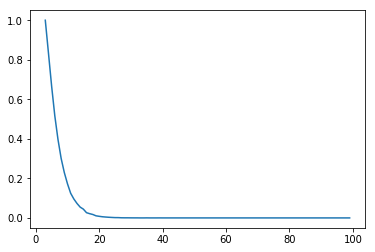

In [41]:
win_rates = []

for n in range(3,100):
    simulation = [simulate_game(n) for i in range(10000)]
    win_rates.append(sum(simulation)/len(simulation))
    
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(3,100),win_rates)
plt.show()

Like I said: not great.